# importing necessary libraries

In [45]:
import pandas as pd 
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
from autocorrect import Speller
from wordcloud import WordCloud
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
import pickle
from collections import Counter

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [2]:
encoding = ['UTF-8','latin-1', 'UTF-32', 'ASCII', 'ISO-8859-1', 'ISO-8859-5', 'ISO-8859-15',
           'Windows-1252', 'KOI8-R', 'Big5', 'GB2312', 'Shift_JIS', 'EUC-KR', 'EUC-JP', 'Windows-1252']
for i in encoding:
    try:
        pd.read_csv(r"C:\Users\LENOVO\Downloads\archive\training.1600000.processed.noemoticon.csv" , encoding = i)
        print(i)
    except UnicodeDecodeError:
        print(i,'is wrong encoding')

UTF-8 is wrong encoding
latin-1
UTF-32 is wrong encoding
ASCII is wrong encoding
ISO-8859-1
ISO-8859-5
ISO-8859-15
Windows-1252
KOI8-R
Big5 is wrong encoding
GB2312 is wrong encoding
Shift_JIS is wrong encoding
EUC-KR is wrong encoding
EUC-JP is wrong encoding
Windows-1252


In [3]:
# read the file
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\archive\training.1600000.processed.noemoticon.csv",encoding="Latin-1",header=None)

In [4]:
df=data.copy()

In [5]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## EDA to explore the data and  DATA CLEANING


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


- Need to rename the colunms
- Need to conver the datatypes

In [7]:
# checking null values
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

- No null values are present 

In [8]:
# checking duplicates
df.duplicated().sum()

0

- No duplicates

In [9]:
# Rename the columns

In [10]:
df.rename(columns={0:"Target",1:"Id",2:"Date",3:"Flag",4:"User",5:"Text"},inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   Id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [12]:
# converting datatypes
df["Date"]=pd.to_datetime(df["Date"])

C:\Users\LENOVO\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [13]:
df.head()

,Target,Id,Date,Flag,User,Text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
# check the data whether it is balanced or imbalanced data and it should be done on basis of Target column.
df["Target"].value_counts()

Target
0    800000
4    800000
Name: count, dtype: int64

- here 0 is negative and 4 is positive and also they are perfectly balanced so it is a balanced data

In [15]:
# As the feature variable Text is text data we need to check whether data contains any html tags,unwanted characters,
# special characters,urls and mainly it should be in either uppercase or lower case.to check that i created a function.

# creating a function for performing eda for text pre-processing
def edat(data,name): # DATAFRAME,COLUMn nAME
    case=" ".join(data[name]).islower()
    html_tags=data[name].apply(lambda x:True if re.search("<.+?>",x) else False).sum()
    url=data[name].apply(lambda x:True if re.search("http[s]?://.+? +",x) else False).sum()
    unwanted_chars=data[name].apply(lambda x:True if re.search("[]()*\-:;\".,@#$%^&0-9]",x) else False).sum()
    if case==False:
        print("not in lower case")
    if html_tags>0:
        print("have html tags")
    if url>0:
        print("have urls")
    if unwanted_chars>0:
        print("have unwanted characters")

In [16]:
## applying the function to text column
edat(df,"Text")

not in lower case
have urls
have unwanted characters


- From this eda we can see that the text is not in lower case and also text contains urls and unwanted characters
- so text preprocessing is needed

In [17]:
stp=stopwords.words("english")
stp.remove("not")

In [18]:
# from this data extract the feature variable and class variable
fea_var=df.iloc[:,-1]
cl_var=df.iloc[:,0]

In [19]:
# splitting the data into xtrain and x_test
x_train,x_test,y_train,y_test=train_test_split(fea_var,cl_var,test_size=0.2,random_state=1,stratify=cl_var)

##### creating functions for pre processing

In [20]:
def lower(x):
    return x.str.lower()

In [21]:
def html(x):
    return x.apply(lambda x:re.sub("<.+?"," ",x))

In [22]:
def url(x):
    return x.apply(lambda x:re.sub("http[s]?://.+? +"," ",x))

In [23]:
def unw(x):
    return x.apply(lambda x:re.sub("[]()/{}*-`''`£!?,:;.,@#$%^&0-9[!_]"," ",x))

In [24]:
def tpp(x): ## tokenization,removing stopwords
    
    l=[]
    for word in word_tokenize(x):
        if word in stp:
            pass
        elif len(word)<=2:
            pass
        else:
            l.append(word)
    
    return " ".join(l)

In [25]:
def stpp(x):
    return x.apply(lambda x : tpp(x))

### creating pipeline for preprocessing

In [26]:
# pipe line for preprocessing. removing html tags,urls,unwanted characters and converting into lower case
pre_pro_pip=Pipeline([("lower",FunctionTransformer(lower)),
                                ("html",FunctionTransformer(html)),
                                ("url",FunctionTransformer(url)),
                                ("unw",FunctionTransformer(unw)),
                     ("stp_tokens",FunctionTransformer(stpp))])

In [63]:
pre_pro_pip

Pipeline(steps=[('lower',
                 FunctionTransformer(func=<function lower at 0x000001E63D9AD6C0>)),
                ('html',
                 FunctionTransformer(func=<function html at 0x000001E638617240>)),
                ('url',
                 FunctionTransformer(func=<function url at 0x000001E63D9AD260>)),
                ('unw',
                 FunctionTransformer(func=<function unw at 0x000001E63D9AD620>)),
                ('stp_tokens',
                 FunctionTransformer(func=<function stpp at 0x000001E634AE7060>))])

In [28]:
# transformed the x_train data which is learned in pipeline
fx_train=pre_pro_pip.fit_transform(x_train)

## EDA after preprocessing

In [29]:
eda_data=pd.concat([fx_train,y_train],axis=1)

In [30]:
eda_data

,Text,Target
999032,rise shining lol mins later planned rush door ...,4
1045663,interview today looking promising,4
302336,emilyalbracht feel pain,0
1427382,old son went exploring amp hiking today found ...,4
64747,lonely housemates gone pub,0
...,...,...
1127399,held together bubblegum amp blessings,4
884337,heehee one,4
989044,bookwitter welcome change mind though let know,4
1581849,howcoza bet bring backup,4


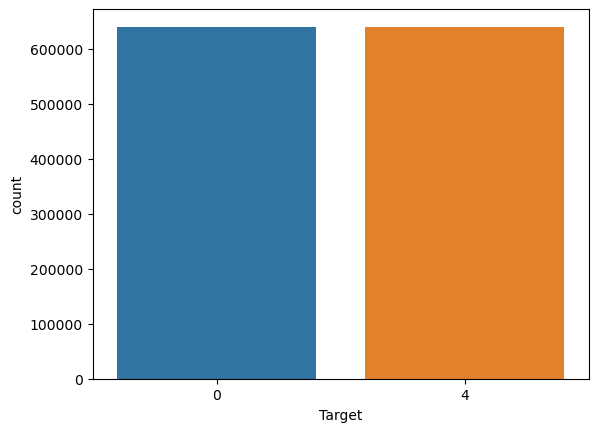

In [31]:
# countplot to visualize no of data points each target has
sns.countplot(x=eda_data["Target"])
plt.show()

In [32]:
# creating separate dataframe for negative
neg=eda_data[eda_data["Target"]==0]

In [33]:
neg

,Text,Target
302336,emilyalbracht feel pain,0
64747,lonely housemates gone pub,0
795110,feeling little weather thank god tomorrow friday,0
774992,shortystuff wont able attend,0
567135,gym get butt kicked slackers punished trainer,0
...,...,...
774485,heavyhand unfortunately work time hun missed a...,0
147478,brandonsavage xxl agavi tshirts skoop wearing ...,0
401363,marginatasnaily nuts says twittering much try ...,0
714313,ddlovato aww guess see,0


In [34]:
# creating separate dataframe for positive
pos=eda_data[eda_data["Target"]==4]

In [35]:
pos

,Text,Target
999032,rise shining lol mins later planned rush door ...,4
1045663,interview today looking promising,4
1427382,old son went exploring amp hiking today found ...,4
1489961,tinaseamonster must seemed like belong not str...,4
1327972,jonas twilight,4
...,...,...
1127399,held together bubblegum amp blessings,4
884337,heehee one,4
989044,bookwitter welcome change mind though let know,4
1581849,howcoza bet bring backup,4


In [36]:
# for loop to join the text that belongs to pos
f=[]
for word in " ".join(pos["Text"]).split():
        f.append(word)

In [37]:
# counting the most common words using counter function
Counter(f).most_common(10)

[('good', 49780),
 ('day', 38710),
 ('love', 38178),
 ('quot', 36801),
 ('like', 30022),
 ('get', 29311),
 ('lol', 28757),
 ('not', 27638),
 ('thanks', 27545),
 ('got', 25596)]

In [38]:
# for loop to join the mails that belongs to negative
f=[]
for word in " ".join(neg["Text"]).split():
        f.append(word)

In [39]:
# counting the most common words using counter function
Counter(f).most_common(10)

[('not', 61622),
 ('get', 36677),
 ('work', 36341),
 ('day', 33235),
 ('like', 32750),
 ('got', 31088),
 ('today', 30562),
 ('going', 26980),
 ('back', 26615),
 ('really', 25206)]

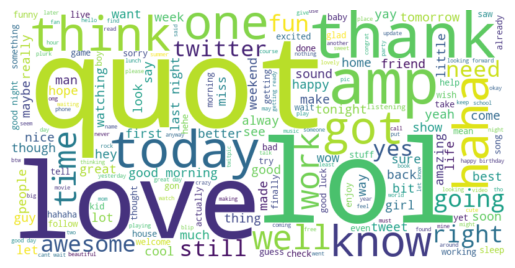

In [46]:
# for visualizing the most repeated or common words in text belongs positive we can use wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(pos["Text"]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

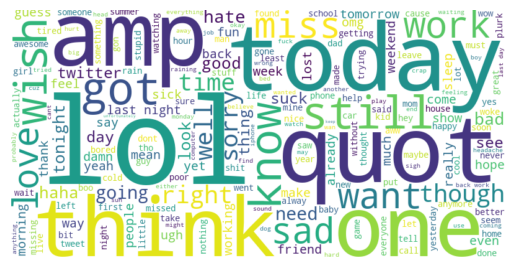

In [47]:
# for visualizing the most repeated or common words in text belongs negative we can use wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(neg["Text"]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

## Final pipeline

In [48]:
# final pipeline conecting preprocess and converting into vectors
final_pip=Pipeline([("pre-process",pre_pro_pip),("vectorizer",CountVectorizer())])

In [64]:
final_pip

Pipeline(steps=[('pre-process',
                 Pipeline(steps=[('lower',
                                  FunctionTransformer(func=<function lower at 0x000001E63D9AD6C0>)),
                                 ('html',
                                  FunctionTransformer(func=<function html at 0x000001E638617240>)),
                                 ('url',
                                  FunctionTransformer(func=<function url at 0x000001E63D9AD260>)),
                                 ('unw',
                                  FunctionTransformer(func=<function unw at 0x000001E63D9AD620>)),
                                 ('stp_tokens',
                                  FunctionTransformer(func=<function stpp at 0x000001E634AE7060>))])),
                ('vectorizer', CountVectorizer())])

In [50]:
# this is the transformed data to transform the train data by using pipeline 
final_pip.fit_transform(x_train)

<1280000x499968 sparse matrix of type '<class 'numpy.int64'>'
	with 9099538 stored elements in Compressed Sparse Row format>

In [51]:
final_pip.transform(x_test)

<320000x499968 sparse matrix of type '<class 'numpy.int64'>'
	with 2192334 stored elements in Compressed Sparse Row format>

## model creation / training

In [52]:
mb=MultinomialNB()
model=mb.fit(final_pip.fit_transform(x_train),y_train)

In [53]:
pred=model.predict(final_pip.transform(x_test))

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78    160000
           4       0.79      0.75      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



## Deployment

In [55]:
pickle.dump(final_pip,open(r"C:\Users\LENOVO\Downloads\final_text_preprocessing.pkl","wb"))

In [59]:
pickle.dump(model,open(r"C:\Users\LENOVO\Downloads\final_twitter_model.pkl","wb"))